In [1]:
#Задание 1
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def function(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp((-1 / 2) * x)

In [2]:
def init_polynomials(n):
    x = np.linspace(1, 15, n)
    
    right = function(x)
    left = np.power((np.ones((n, n)) * x).T, np.linspace(0, n - 1, n))
    solve = np.linalg.solve(left, right)
    
    return np.sum((solve * left), axis=1)


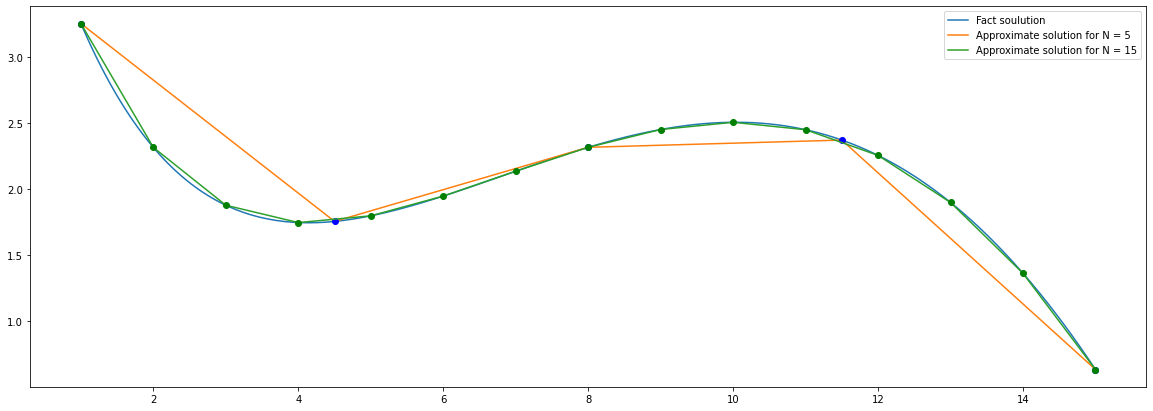

In [3]:
plt.figure(figsize=(20,7))
x = np.linspace(1, 15, 250)
plt.plot(x, function(x), label='Fact soulution')


y = init_polynomials(5)
x = np.linspace(1, 15, 5)
plt.plot(x, y, label='Approximate solution for N = 5')
plt.plot(x, y, 'bo')

y = init_polynomials(15)
x = np.linspace(1, 15, 15)
plt.plot(x, y, label='Approximate solution for N = 15')
plt.plot(x, y, 'go')

plt.legend()

# График с большим колличесвтом точек строит значительно ближе




In [4]:
#задание 2

def init_polynomials_with_errors(n):
    x = np.linspace(1, 15, n)
    error = np.random.normal(0, 0.01, n) 
    
    right = function(x) + error
    left = np.power((np.ones((n, n)) * x).T, np.linspace(0, n - 1, n))
    
    solve = np.linalg.solve(left, right)
    return np.sum((solve * left), axis=1)





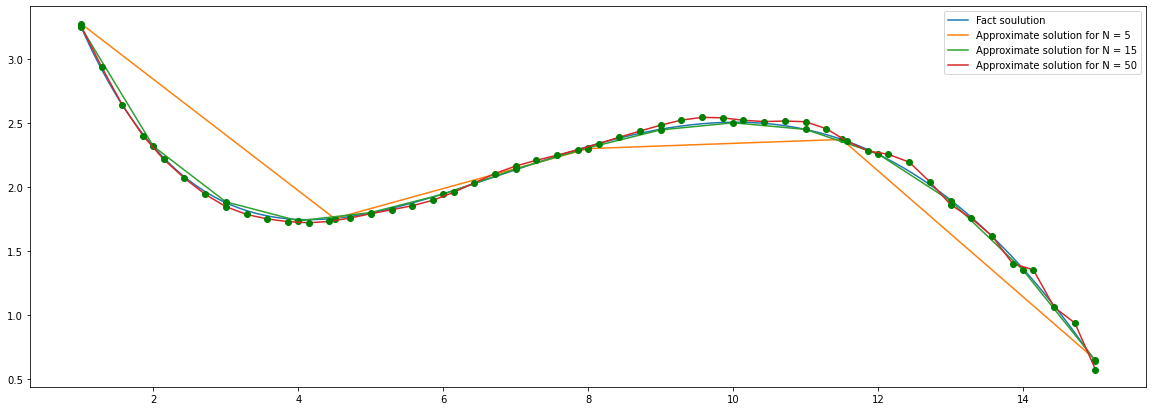

In [5]:
x = np.linspace(1, 15, 250)
plt.figure(figsize=(20,7))
plt.plot(x, function(x), label='Fact soulution')


y = init_polynomials_with_errors(5)
x = np.linspace(1, 15, 5)
plt.plot(x, y, label='Approximate solution for N = 5')
plt.plot(x, y, 'go')

y = init_polynomials_with_errors(15)
x = np.linspace(1, 15, 15)
plt.plot(x, y, label='Approximate solution for N = 15')
plt.plot(x, y, 'go')

y = init_polynomials_with_errors(50)
x = np.linspace(1, 15, 50)
plt.plot(x, y, label='Approximate solution for N = 50')
plt.plot(x, y, 'go')

plt.legend()
#При n большим чем размер промежутка, начинаются скачки, до этого шум особо не влияет

In [6]:
#Задание 3

def init_polynomials_with_errors_and_less_square_method(n):
    N = 4
    x = np.linspace(1, 15, n)
    error = np.random.normal(0, 0.01, n) 
    
    right = function(x) + error
    left = np.power((np.ones((N, n)) * x).T, np.linspace(0, N - 1, N))
    
    solve = np.linalg.lstsq(left, right)
    return np.sum((solve[0] * left), axis=1), right

/var/folders/zx/bm71cvf56js9j_k56pdpry840000gn/T/ipykernel_90443/3707033951.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solve = np.linalg.lstsq(left, right)


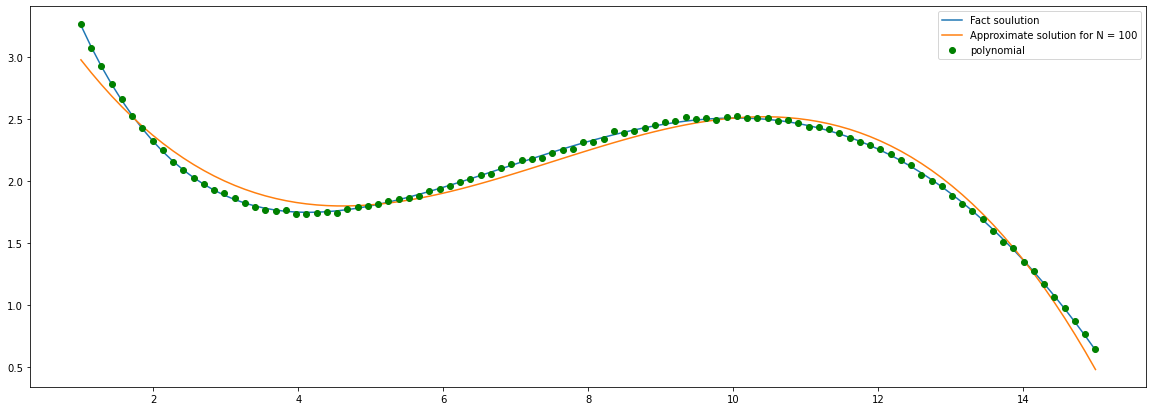

In [7]:
x = np.linspace(1, 15, 100)
plt.figure(figsize=(20,7))
plt.plot(x, function(x), label='Fact soulution')


y, solve = init_polynomials_with_errors_and_less_square_method(100)
x = np.linspace(1, 15, 100)
plt.plot(x, y, label='Approximate solution for N = 100')
plt.plot(x, solve, 'go', label='polynomial')

plt.legend()

In [ ]:
#Метод наименьших квадратов хорош приближает, но все же стоит использовать меньше точек, небольшие скачки заметны